## Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

## Загрузка данных

In [2]:
data = pd.read_csv('data_for_model.csv', sep = ';')

In [3]:
# переименовать столбцы

data.columns = data.columns.str.replace(' ', '_').str.lower()

In [4]:
data.head()

,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,target
0,12423,710,441.5,5,4631.0,1
1,13983,1106,NaN,3,4256.0,1
2,15520,1276,391.5,1,4397.0,0
3,29535,1106,NaN,1,3772.0,1
4,26154,976,315.0,5,2445.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   predictor_1  10000 non-null  int64  
 1   predictor_2  10000 non-null  int64  
 2   predictor_3  8087 non-null   float64
 3   predictor_4  10000 non-null  int64  
 4   predictor_5  10000 non-null  float64
 5   target       10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


In [6]:
# наличие пропусков

data.isna().mean()

predictor_1    0.0000
predictor_2    0.0000
predictor_3    0.1913
predictor_4    0.0000
predictor_5    0.0000
target         0.0000
dtype: float64

In [7]:
# заполним пропуски медианным значением

data['predictor_3'].fillna(data.predictor_3.median(), inplace=True)

In [8]:
# наличие пропусков

data.isna().mean()

predictor_1    0.0
predictor_2    0.0
predictor_3    0.0
predictor_4    0.0
predictor_5    0.0
target         0.0
dtype: float64

In [9]:
data['target'].value_counts()

0    8045
1    1955
Name: target, dtype: int64

In [10]:
data.columns

Index(['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4',
       'predictor_5', 'target'],
      dtype='object')

In [11]:
data[['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4',
       'predictor_5']].describe()

,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,20107.924800,1123.810200,370.35285,3.490400,2518.598750
std,12679.903068,146.337209,61.73082,3.827607,1447.114231
min,7.000000,564.000000,62.00000,1.000000,0.500000
25%,9651.250000,1050.000000,332.50000,1.000000,1261.375000
50%,18850.000000,1106.000000,377.50000,3.000000,2536.500000
75%,28010.500000,1214.000000,407.50000,5.000000,3765.125000
max,49996.000000,1450.000000,512.50000,49.000000,5000.000000


In [12]:
# проверим типы данных

for col, type_col in zip(data.columns, data.dtypes):
    print(f'Столбец {col} тип данных {type_col}')

Столбец predictor_1 тип данных int64
Столбец predictor_2 тип данных int64
Столбец predictor_3 тип данных float64
Столбец predictor_4 тип данных int64
Столбец predictor_5 тип данных float64
Столбец target тип данных int64


In [13]:
# Проверим количество строк в столбцах

for col, i in zip(data.columns, data.count()):
    print(f'Столбец {col} количество строк {i}')

Столбец predictor_1 количество строк 10000
Столбец predictor_2 количество строк 10000
Столбец predictor_3 количество строк 10000
Столбец predictor_4 количество строк 10000
Столбец predictor_5 количество строк 10000
Столбец target количество строк 10000


## Корреляция

In [14]:
data.corr()

,predictor_1,predictor_2,predictor_3,predictor_4,predictor_5,target
predictor_1,1.000000,0.024318,-0.000536,-0.012252,0.002024,-0.007787
predictor_2,0.024318,1.000000,0.422611,-0.255252,-0.028135,-0.261663
predictor_3,-0.000536,0.422611,1.000000,-0.243960,-0.009769,-0.275649
predictor_4,-0.012252,-0.255252,-0.243960,1.000000,-0.014792,0.213800
predictor_5,0.002024,-0.028135,-0.009769,-0.014792,1.000000,0.006806
target,-0.007787,-0.261663,-0.275649,0.213800,0.006806,1.000000


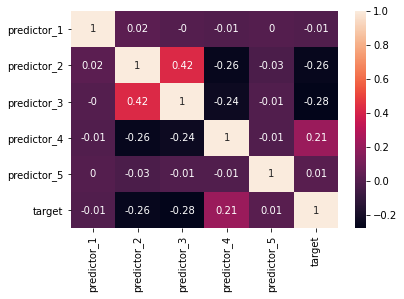

In [15]:
correlation_matrix = data.corr().round(2)

# annot = True для печати значений внутри квадрата

sns.heatmap(data=correlation_matrix, annot=True);

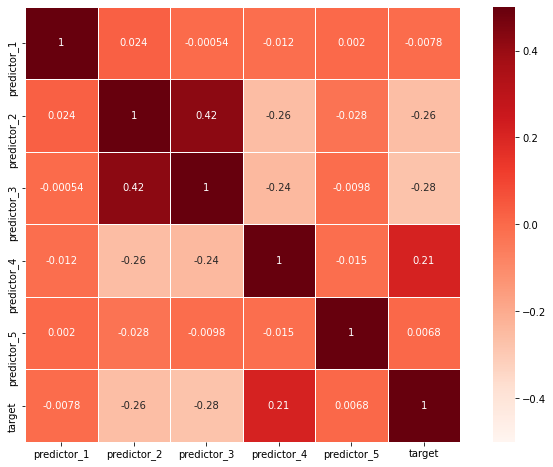

In [16]:
corr = data[['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4',
       'predictor_5', 'target']].corr()
f, ax = plt.subplots(figsize=(12, 8))

# Color Map, not mandatory
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heat Map
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, vmax=.5, vmin = -0.5, center=0,
            square=True, linewidths=.5);

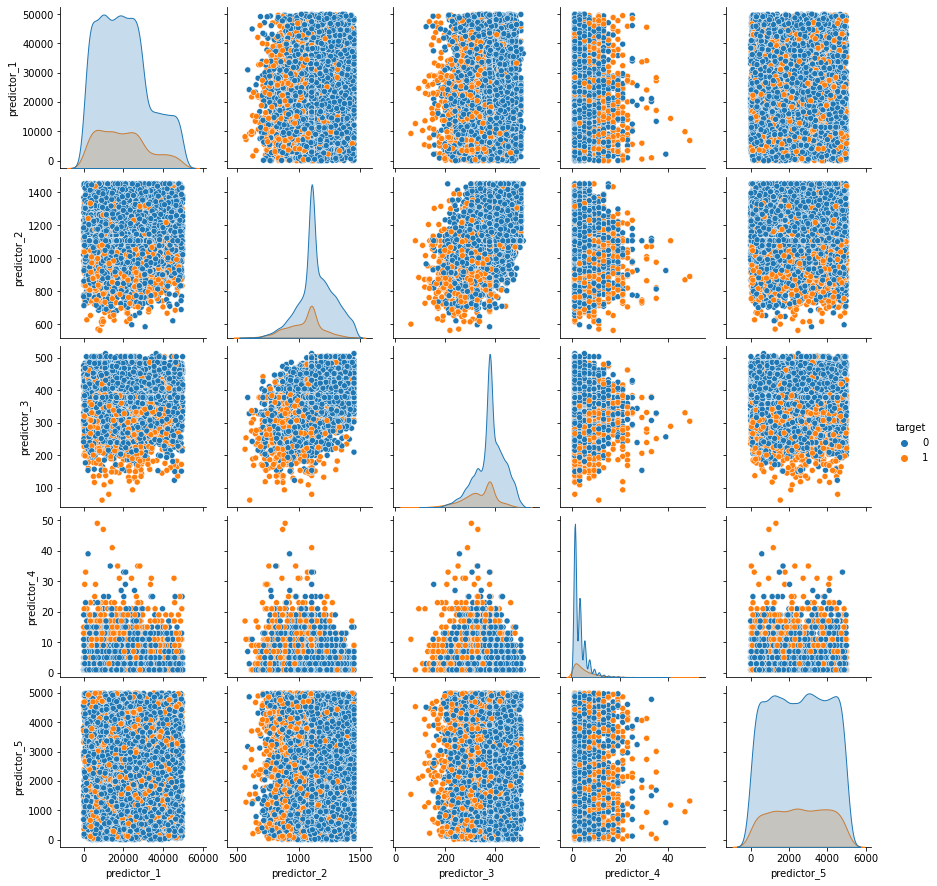

In [17]:
Exploration_columns = data[['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4',
       'predictor_5', 'target']]
sns.pairplot(Exploration_columns, hue='target');

In [18]:
corrMatrix = data.loc[:, data.columns != 'target'].corr()

corrAbs = corrMatrix.abs().unstack()
corrSorted = corrAbs.sort_values(ascending = False).drop_duplicates()

corrSorted.head(60)

predictor_5  predictor_5    1.000000
predictor_2  predictor_3    0.422611
predictor_4  predictor_2    0.255252
             predictor_3    0.243960
predictor_2  predictor_5    0.028135
             predictor_1    0.024318
predictor_4  predictor_5    0.014792
predictor_1  predictor_4    0.012252
predictor_3  predictor_5    0.009769
predictor_5  predictor_1    0.002024
predictor_1  predictor_3    0.000536
dtype: float64

In [19]:
data.columns

Index(['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4',
       'predictor_5', 'target'],
      dtype='object')

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
names = ['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4',
       'predictor_5', 'target']

array = data.values
X = array[:,0:5] # dataframe --> массив numpy
Y = array[:,5]

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

[ 4848.254 13045.411  7817.346  1918.462   385.063]
[[1.242e+04 7.100e+02 4.415e+02 5.000e+00]
 [1.398e+04 1.106e+03 3.775e+02 3.000e+00]
 [1.552e+04 1.276e+03 3.915e+02 1.000e+00]
 [2.954e+04 1.106e+03 3.775e+02 1.000e+00]
 [2.615e+04 9.760e+02 3.150e+02 5.000e+00]]


### Отбор признаков

На основе анализа корреляции и одномерного отбора признаков по критерию хи-квадрат, оставляем для модели 4 лучших признака

In [22]:
X = data[['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4']]
Y = data['target']

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [24]:
# разделим наши данные
from sklearn.model_selection import train_test_split


X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [25]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(pd.DataFrame(X_train))
X_test_s = scaler.fit_transform(pd.DataFrame(x_test))
X_total_s = scaler.fit_transform(pd.DataFrame(data[['predictor_1', 'predictor_2', 'predictor_3', 'predictor_4']]))

## Логистическая регрессия

In [26]:
# реализуем логистическую регрессию

lr = LogisticRegression(solver='liblinear')
model_lr = lr.fit(X_train_s, Y_train)

accuracy_train = model_lr.score(X_train_s, Y_train)
accuracy_test = model_lr.score(X_test_s, y_test)
accuracy = model_lr.score(X_total_s,  data['target'])


print('Training Accuracy for LogisticRegression:', np.round(accuracy_train, 3))
print('Validation Accuracy for LogisticRegression:', np.round(accuracy_test, 3))

Training Accuracy for LogisticRegression: 0.81
Validation Accuracy for LogisticRegression: 0.804


In [27]:
metrics.roc_auc_score(Y_train, model_lr.predict_proba(X_train_s)[:, 1])

0.72808247720659

Logistic: f1=0.216 auc=0.449


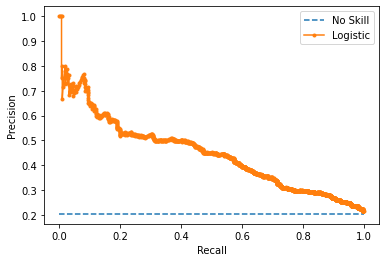

In [28]:
# predict probabilities
lr_probs = model_lr.predict_proba(X_test_s)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_lr.predict(X_test_s)
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.749


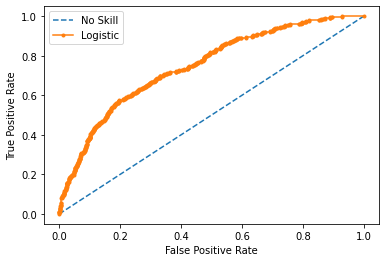

In [29]:
# generate a no skill prediction (majority class)

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model_lr.predict_proba(X_test_s)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend

plt.legend()
# show the plot

plt.show()

## RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_jobs = -1, n_estimators = 50, bootstrap = True, max_depth = 5,
                            max_features = .1)

model_rfc = rfc.fit(X_train_s, Y_train)

accuracy_train = model_rfc.score(X_train_s, Y_train)
accuracy_test = model_rfc.score(X_test_s, y_test)
accuracy = model_rfc.score(X_total_s,  data['target'])


print('Training Accuracy for LogisticRegression:', np.round(accuracy_train, 3))
print('Validation Accuracy for LogisticRegression:', np.round(accuracy_test, 3))

Training Accuracy for LogisticRegression: 0.815
Validation Accuracy for LogisticRegression: 0.8


In [31]:
metrics.roc_auc_score(Y_train, model_rfc.predict_proba(X_train_s)[:, 1])

0.7585190908212603

RandomForest: f1=0.091 auc=0.438


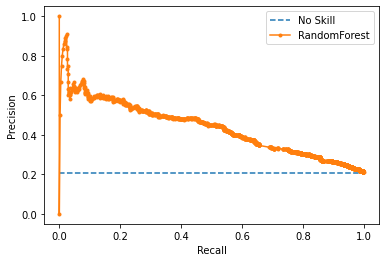

In [34]:
# predict probabilities
lr_probs = model_rfc.predict_proba(X_test_s)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_rfc.predict(X_test_s)
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
# summarize scores
print('RandomForest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='RandomForest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.745


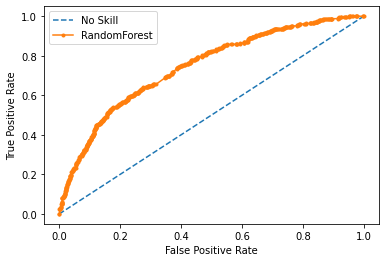

In [33]:
# generate a no skill prediction (majority class)

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model_rfc.predict_proba(X_test_s)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
lr_auc = metrics.roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RandomForest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend

plt.legend()
# show the plot

plt.show()

Обе модели обладают схожими метриками качества и имеют схожие доли предсказаний объектов верного класса.

# Описание

### Этапы
1. Импорт библиотек
2. Загрузка и предобработка данных
3. EDA-анализ, корреляционный анализ данных
4. Отбор признаков
5. Импорт функционала библиотеки SKLearn
6. Модель логистической регрессии
7. Модель классификации на базе алгоритма случайного леса